# **Fully Connnected Layer (Dense Layer)**

Fully Connected Layer (FC layer) atau Dense Layer adalah lapisan pada jaringan saraf tiruan (Artificial Neural Network) di mana setiap neuron terhubung dengan seluruh neuron pada lapisan sebelumnya.

Lapisan ini berfungsi untuk:

1. Menggabungkan seluruh fitur yang telah diekstraksi

2. Melakukan proses pengambilan keputusan

3. Menghasilkan output akhir berupa kelas, probabilitas, atau nilai prediksi

Dalam arsitektur CNN, fully connected layer biasanya berada di bagian akhir jaringan setelah feature extraction (Konvolusi-Aktivasi-Pooling) selesai.

Pada fully connected layer:

- Setiap input memiliki bobot (weight)

- Setiap neuron memiliki bias

- Output dihitung melalui kombinasi linear lalu dilewatkan ke fungsi aktivasi

# **Model Matematis Fully Connected Layer**

Misalkan:

Input vektor:
$$
\mathbf{x} = [x_1, x_2, \dots, x_n]^T
$$

Bobot:
$$
\mathbf{w} = [w_1, w_2, \dots, w_n]^T
$$

Bias:
$$
b
$$

Operasi linear pada fully connected layer:
$$
z = \mathbf{w}^T \mathbf{x} + b
$$


# **Import Library**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

Penjelasan:

- torch : library utama PyTorch

- torch.nn : berisi layer neural network, termasuk Linear (fully connected)

- torch.optim : optimizer (Adam, SGD, dll)

- datasets : dataset siap pakai (MNIST)

- transforms : preprocessing data

- DataLoader : batching data

- matplotlib : visualisasi

- numpy : operasi numerik

# **Transformasi Data**

In [ ]:
# Transformasi data: ubah gambar ke tensor
transform = transforms.Compose([transforms.ToTensor()])

Penjelasan:

- ToTensor(): mengubah skala gambar nilai piksel dari [0,255] → [0,1]

# **Load Dataset MNIST**

In [ ]:
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

100%|██████████| 9.91M/9.91M [00:00<00:00, 60.2MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.72MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 12.0MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 1.34MB/s]


Penjelasan:

- MNIST berisi angka 0–9

- train=True : data latih

- train=False : data uji

- transform=transform : preprocessing diterapkan

# **DataLoader (Batching)**

In [ ]:
# DataLoader untuk batching
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

Penjelasan:

- Data tidak diproses satu per satu, tapi per batch

- batch_size=64 : artinya 64 gambar diproses sekaligus

- shuffle=True untuk training : mencegah bias urutan data

# **Visualisasi Sampel Data**

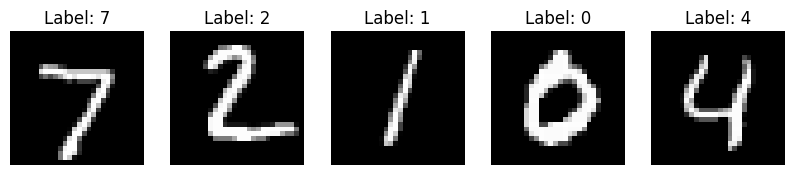

In [ ]:
# menampilkan beberapa gambar dari dataset
def show_sample_images(dataset, num=5):
    fig, axes = plt.subplots(1, num, figsize=(10, 2))
    for i in range(num):
        img, label = dataset[i]
        axes[i].imshow(img.squeeze(), cmap='gray')
        axes[i].set_title(f'Label: {label}')
        axes[i].axis('off')
    plt.show()

show_sample_images(test_dataset)

# **Model Fully Connected**

In [ ]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # 784 -> 128
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)       # 10 kelas

    def forward(self, x):
        x = x.view(x.size(0), -1)          # Flatten: (batch, 1, 28, 28) -> (batch, 784)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

model = SimpleNN()

Penjelasan:

**A. Bagian init**

- super(...): Untuk mengakses fungsi dari induk nn.Module

- nn.Linear(28 * 28, 128):
> - 28 * 28 = 784 → jumlah fitur gambar 28x28.
> - 128 → jumlah neuron di layer ini.
> - Tujuan: Membuat Fully Connected Layer pertama.

- nn.ReLU(): Fungsi aktivasi untuk menambah kemampuan belajar model.
- nn.Linear(64, 10): Layer akhir, output 10 kelas (angka 0–9).


**B. Bagian forward**

- x.view(x.size(0), -1):
> - x.size(0) → ukuran batch (jumlah gambar).
> - -1 → otomatis hitung sisa dimensi (784).
> - Tujuan: Flatten gambar dari [batch, 1, 28, 28] menjadi [batch, 784].

- Alur forward:
> - Masuk ke fc1, aktifasi ReLU, masuk ke fc2, aktifasi ReLU, lalu ke fc3.

# **Inisialisasi Loss Function, dan Optimizer**

In [ ]:
# Optimizer & Loss
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Penjelasan:

- nn.CrossEntropyLoss(): Fungsi loss untuk klasifikasi multikelas

- optim.Adam(...): Algoritma optimasi untuk memperbaiki bobot model
> - lr=0.001 → learning rate (berapa besar langkah belajar model).


# **Training Loop**

In [ ]:
# Training Loop
train_losses = []
train_accuracies = []

def evaluate_model(loader):
    correct = 0
    total = 0
    model.eval()
    with torch.no_grad():
        for images, labels in loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return accuracy

for epoch in range(5):  # Naikkan jumlah epoch untuk hasil lebih baik
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    train_losses.append(avg_loss)

    # Evaluasi setiap epoch
    acc = evaluate_model(train_loader)
    train_accuracies.append(acc)

    print(f'Epoch [{epoch+1}/5], Loss: {avg_loss:.4f}, Train Acc: {acc:.2f}%')

# Evaluasi pada test set
test_acc = evaluate_model(test_loader)
print(f'Test Accuracy: {test_acc:.2f}%')

Epoch [1/5], Loss: 0.3313, Train Acc: 95.46%
Epoch [2/5], Loss: 0.1357, Train Acc: 96.88%
Epoch [3/5], Loss: 0.0935, Train Acc: 98.10%
Epoch [4/5], Loss: 0.0688, Train Acc: 98.36%
Epoch [5/5], Loss: 0.0553, Train Acc: 98.66%
Test Accuracy: 97.32%


Penjelasan:

**A. Inisialisasi List untuk Pelacakan Metrik**

- train_losses: Menyimpan rata-rata loss pelatihan tiap epoch

- train_accuracies: Menyimpan akurasi pelatihan tiap epoch

Berguna untuk visualisasi/perbandingan performa model sepanjang pelatihan

**B. Fungsi Evaluasi Model (evaluate_model)**

Tujuan: Hitung akurasi model pada loader tertentu (train_loader atau test_loader).

- model.eval() penting karena:
> Layer seperti Dropout dan BatchNorm berperilaku berbeda saat training vs eval.

- torch.no_grad():
> Menghemat memori & waktu karena tidak menyimpan graf komputasi (tidak perlu backward pass).

**C. Training Loop Utama**

- optimizer.zero_grad() : Hapus gradien sebelumnya agar tidak terakumulasi

- Forward pass (model(images)) : Hitung prediksi dari input

- Hitung loss (criterion) : Misal CrossEntropyLoss untuk klasifikasi

- loss.backward() : Hitung gradien semua parameter terhadap loss

- optimizer.step() : Update bobot (misal: SGD, Adam)

- Akumulasi & rata-rata loss : Untuk melacak progres pelatihan

- Evaluasi akurasi : Di sini dilakukan pada data latih

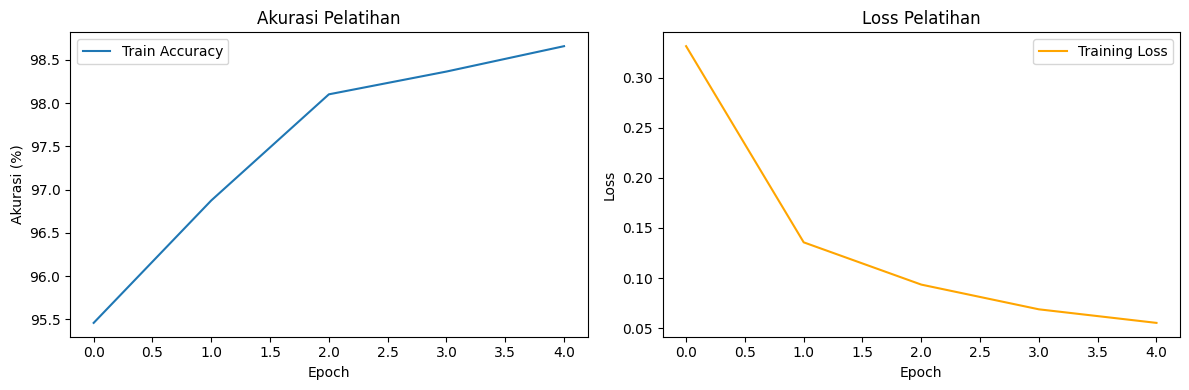

In [ ]:
# Plot grafik akurasi dan loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_accuracies, label='Train Accuracy')
plt.title('Akurasi Pelatihan')
plt.xlabel('Epoch')
plt.ylabel('Akurasi (%)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_losses, label='Training Loss', color='orange')
plt.title('Loss Pelatihan')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Penjelasan:

- plt.figure(figsize=(12, 4))
> - Membuat figur (canvas) baru untuk plot.
> - figsize=(12, 4) → lebar 12 inci, tinggi 4 inci (lebar memanjang, cocok untuk 2 plot berdampingan).

- plt.subplot(1, 2, 1)
> - Membagi figur menjadi grid 1 baris × 2 kolom, dan memilih subplot pertama (kiri).
> - Format: subplot(rows, cols, index) → index dimulai dari 1.

- plt.plot(train_accuracies, label='Train Accuracy')
> - Menggambar garis (line plot) dari data train_accuracies.
> - train_accuracies adalah list yang berisi akurasi tiap epoch (misal: [72.5, 80.1, 85.3, 89.7, 93.0]).
> - label='Train Accuracy' → teks yang akan muncul di legend.

- plt.title('Akurasi Pelatihan')
> - Memberi judul pada subplot kiri.

- plt.xlabel('Epoch') & plt.ylabel('Akurasi (%)')
> - Memberi label sumbu:
>> - Sumbu x: "Epoch" → putaran pelatihan (1 epoch = 1 kali melewati seluruh data latih).
>> - Sumbu y: "Akurasi (%)" → persentase prediksi benar.

-  plt.legend()
> - Menampilkan legenda (kotak kecil yang menjelaskan arti garis, misal: "Train Accuracy").
> - 🔁 Langkah serupa diulang untuk subplot kedua (kanan), tapi dengan:
>> - plt.subplot(1, 2, 2) → subplot kedua (kanan).
>> - plt.plot(train_losses, ..., color='orange') → plot data train_losses dengan warna oranye.
>> - Judul: 'Loss Pelatihan', sumbu y: 'Loss'.

- plt.tight_layout()
> - Menyesuaikan jarak antar subplot agar tidak tumpang tindih (misal: judul tidak menutupi angka di sumbu).
> - Sangat penting saat menampilkan banyak subplot!

- plt.show()
> - Menampilkan plot di layar (di Jupyter Notebook, Google Colab, dsb).

# **Latihan**

Modifikasi code di atas menggunakan dataset Fashion MNIST.